## Plot results from VVL test with SSH = 0
These results were generated with teh following setup:
- Salmon bank spill at -122.86 48.38
- currents west above 2m and north below 2m
- constant wave period (5), wave height (0.8), wcc (0.001), StokesU = StokesV = 0
- SSH from /scratch/dlatorne/MIDOSS/forcing/vvl_test/t.hdf5
- currents $PROJECT/rmueller/MIDOSS/forcing/vvl_testing/currents_west_above2_north_below2.hdf5
- /scratch/dlatorne/MIDOSS/forcing/vvl_test/e3t.hdf5
- Results on Graham at /home/rmueller/project/rmueller/MIDOSS/results/testvvl_10oct19b 

Both e3t.hdf5 and t.hdf5 were re-created for this run to try and troubleshoot the "land point" error. 

In [1]:
# imports for graphic display
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.colors as colors
import cmocean as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

# imports for data manipulation
import numpy as np
import xarray as xr
from salishsea_tools import viz_tools, utilities
import numpy.ma as ma
import datetime

# basic computations
from scipy import stats

## Load data

In [2]:
vvl0 = xr.open_dataset('/home/rmueller/Projects/MIDOSS/results/vvl/testvvl_10oct19b/Lagrangian_AKNS_crude_vvl_test_de0ae8ae112b_ssh0.nc')

In [3]:
vvl0

<xarray.Dataset>
Dimensions:              (grid_x: 396, grid_y: 896, grid_z: 40, time: 168)
Coordinates:
  * time                 (time) datetime64[ns] 2017-01-01T00:30:00 ...
  * grid_y               (grid_y) int16 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...
  * grid_x               (grid_x) int16 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...
  * grid_z               (grid_z) int16 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...
Data variables:
    OilConcentration_2D  (time, grid_y, grid_x) float64 ...
    Thickness_2D         (time, grid_y, grid_x) float64 ...
    Dissolution_3D       (time, grid_z, grid_y, grid_x) float64 ...
    OilConcentration_3D  (time, grid_z, grid_y, grid_x) float64 ...
    Beaching_Time        (grid_y, grid_x) datetime64[ns] ...
    Oil_Arrival_Time     (grid_y, grid_x) datetime64[ns] ...
Attributes:
    nco_openmp_thread_number:   1
    history:                    Thu Oct 10 16:02:54 2019: ncks -4 -L4 -A /loc...
    NCO:                        4.6.6
    history_of_appended_file

## Extract surface concentrations and calculate depth-integrated values

In [30]:
vvl0_conc_surf = vvl0.OilConcentration_3D[:,39,:,:]
vvl0_conc_surf

<xarray.DataArray 'OilConcentration_3D' (time: 168, grid_y: 896, grid_x: 396)>
[59609088 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2017-01-01T00:30:00 2017-01-01T01:30:00 ...
  * grid_y   (grid_y) int16 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * grid_x   (grid_x) int16 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
    grid_z   int16 39
Attributes:
    standard_name:  OilConcentration_3D
    long_name:      OilConcentration_3D
    units:          Kg/m3

In [57]:
# loop through time values and sum all bottom levels
time = vvl0.time.values
nx = np.arange(vvl0.grid_x.size)
ny = np.arange(vvl0.grid_y.size)
vvl0_conc_depth = np.zeros((168,896,396), dtype=float)

# loop through time and sum concentrations over depth
for t in range(time.size):
    vvl0_conc_instant= vvl0.OilConcentration_3D[t,:,:,:]
    vvl0_conc_depth[t,:,:] = vvl0_conc_instant.sum(dim='grid_z')

## Sum values over time to show complete spread over time

In [79]:
# calculate integrated values over time
vvl0_conc_surf_t = vvl0_conc_surf.sum(dim='time')
vvl0_conc_t = vvl0_conc_depth.sum(axis=0)

In [81]:
vvl0_conc_t.shape

(896, 396)

## Plot up results

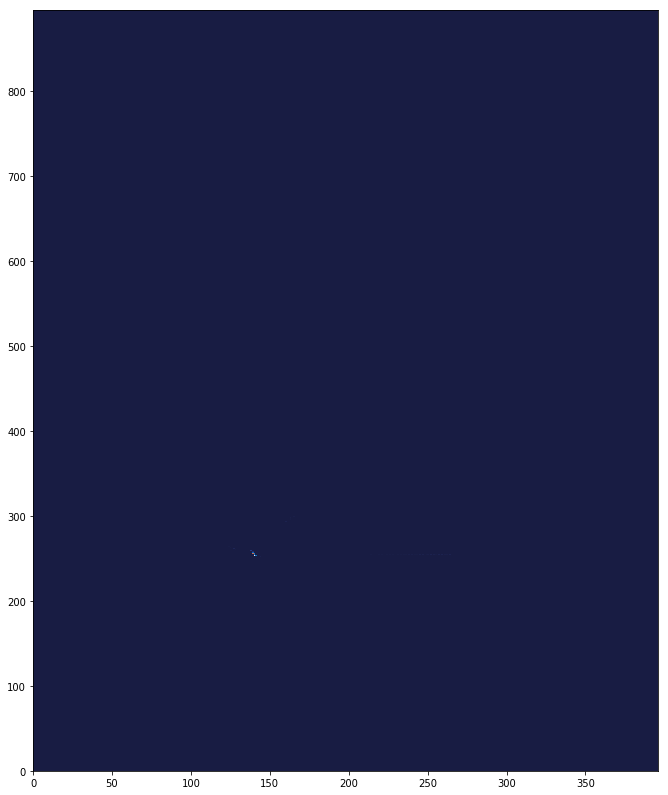

In [62]:
fig = plt.figure(figsize=(8*1.4,10*1.4))
ax1 = fig.add_subplot(111)
# convert xarray into numpy using ".values" in order to gain access to different visualization tools
mappable = ax1.pcolormesh(vvl0_conc_surf_t.values, vmin = 0, vmax = 100, cmap = cm.cm.balance)

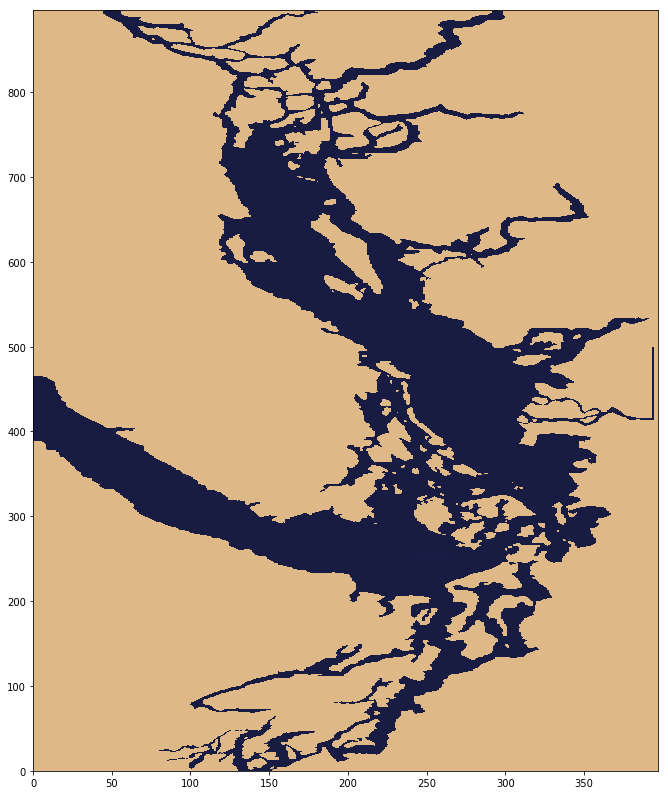

In [63]:
fig = plt.figure(figsize=(8*1.4,10*1.4))
ax1 = fig.add_subplot(111)
# convert xarray into numpy using ".values" in order to gain access to different visualization tools
mappable = ax1.pcolormesh(vvl0_conc_surf_t.values, vmin = 0, vmax = 100, cmap = cm.cm.balance)

# add land mask to ax1 and ax2
viz_tools.plot_land_mask(ax1,'/home/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')


Text(0.5, 1.0, '3D concentrations added over depth and then time')

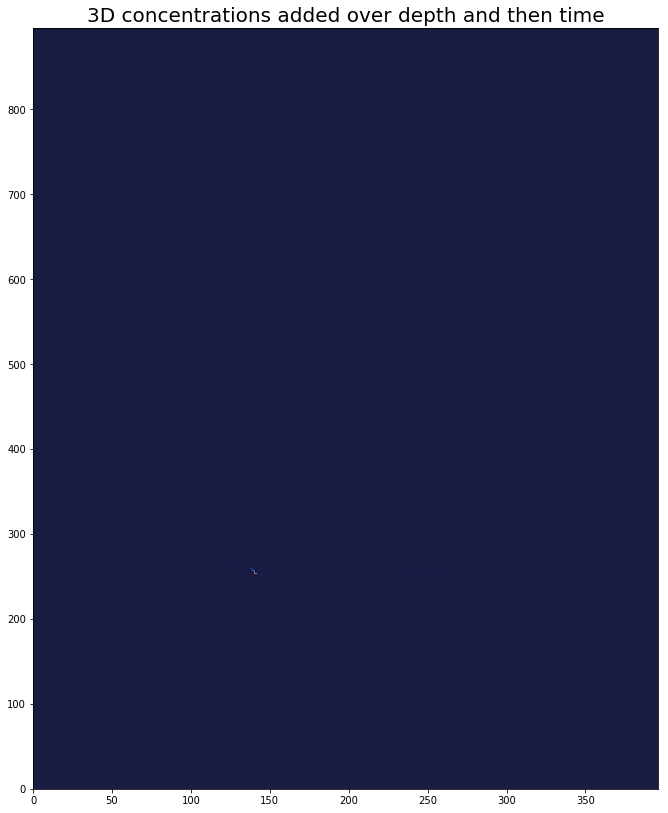

In [82]:
fig = plt.figure(figsize=(8*1.4,10*1.4))
ax1 = fig.add_subplot(111)
# convert xarray into numpy using ".values" in order to gain access to different visualization tools
mappable = ax1.pcolormesh(vvl0_conc_t, cmap = cm.cm.balance)
ax1.set_title('3D concentrations added over depth and then time', fontsize=20)

Text(0.5, 1.0, '3D concentrations added over depth and then time')

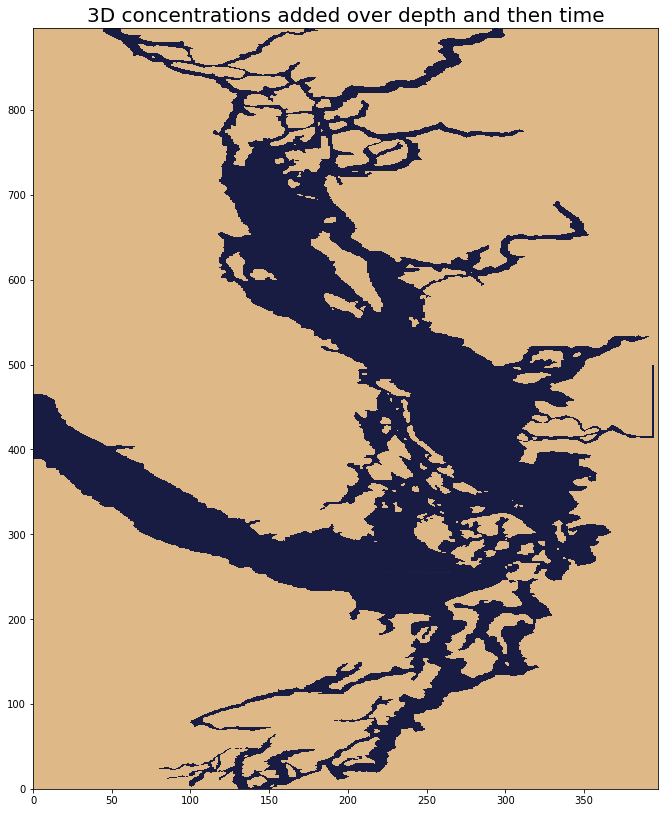

In [83]:
fig = plt.figure(figsize=(8*1.4,10*1.4))
ax1 = fig.add_subplot(111)
mappable = ax1.pcolormesh(vvl0_conc_t, cmap = cm.cm.balance)
# add land mask to ax1 and ax2
viz_tools.plot_land_mask(ax1,'/home/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')
ax1.set_title('3D concentrations added over depth and then time', fontsize=20)